In [443]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

fifaGK=pd.read_csv('../data/cleaned/GK_summary.csv')
fifaOUT=pd.read_csv('../data/cleaned/OUT_summary.csv')

In [444]:
X=fifaGK[['value_eur']]
y=fifaGK[['overall']]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [445]:
lm = LinearRegression()

In [446]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [447]:
lm.coef_

array([[4.71127183]])

In [448]:
cdf=pd.DataFrame(lm.coef_,X.columns ,columns=['Coef'])
print(cdf)

               Coef
value_eur  4.711272


In [449]:
predictions=lm.predict(X_test)

In [450]:
# Necersar pt a putea transforma datele 2D in 1D poti folosi si flatten()

predictions = np.ravel(predictions)  
y_test = np.ravel(y_test)

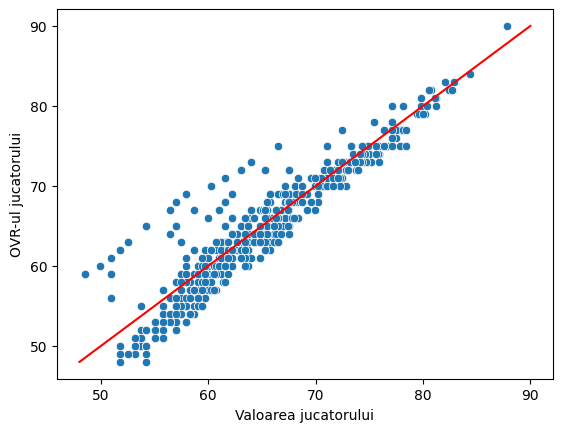

In [451]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Valoarea jucatorului')
plt.ylabel('OVR-ul jucatorului')

min_val = min(min(predictions), min(y_test))
max_val = max(max(predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')

In [452]:
import math


print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ", mean_squared_error(y_test,predictions))
print("RMSE: " , math.sqrt(mean_absolute_error(y_test,predictions)))

Mean Absolute Error:  2.1125212387825294
Mean Squared Error:  9.234738780098589
RMSE:  1.453451491719806


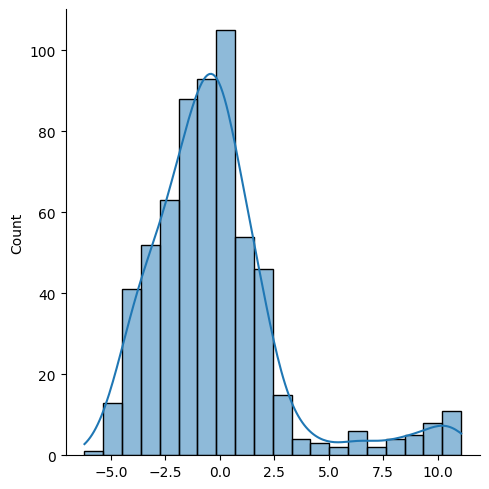

In [453]:
residuals=y_test-predictions

sns.displot(residuals, bins=20, kde=True)

In [454]:
import torch
import torch.nn as nn
import torch.optim as optim

In [455]:
X=fifaGK['overall']
y=fifaGK['release_clause_eur']

X_tensor = torch.tensor(X.values, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

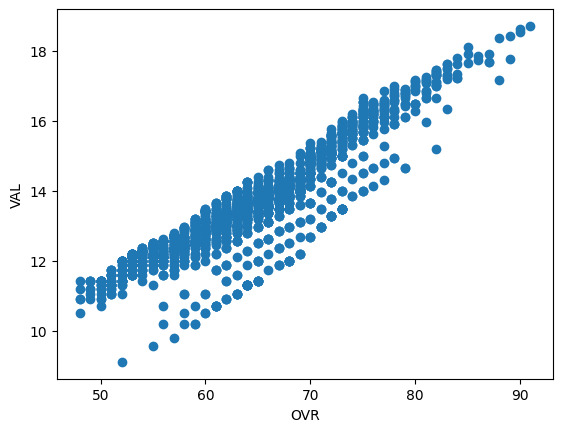

In [456]:
plt.scatter(X_tensor,y_tensor)
plt.xlabel('OVR')
plt.ylabel('VAL')
plt.show()


In [457]:
class linearRegresion(nn.Module):
    def __init__(self, in_feature,out_feature):
        super().__init__()
        self.linear=nn.Linear(in_feature,out_feature)
    
    def forward(self,x):
        return self.linear(x)

In [458]:
model=linearRegresion(1,1)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=1e-7)

In [459]:
epochs=8000
losses=[]

In [460]:
for epoch in range(epochs):
    y_pred=model(X_tensor)
    loss =criterion(y_pred,y_tensor)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 100 == 0:
        print(f'epoch:[{epoch} / {epochs}],Loss:{loss.item():.4f}')
    

epoch:[0 / 8000],Loss:5651.1470
epoch:[100 / 8000],Loss:4772.9888
epoch:[200 / 8000],Loss:4031.2996
epoch:[300 / 8000],Loss:3404.8755
epoch:[400 / 8000],Loss:2875.8013
epoch:[500 / 8000],Loss:2428.9473
epoch:[600 / 8000],Loss:2051.5383
epoch:[700 / 8000],Loss:1732.7791
epoch:[800 / 8000],Loss:1463.5575
epoch:[900 / 8000],Loss:1236.1733
epoch:[1000 / 8000],Loss:1044.1268
epoch:[1100 / 8000],Loss:881.9255
epoch:[1200 / 8000],Loss:744.9310
epoch:[1300 / 8000],Loss:629.2261
epoch:[1400 / 8000],Loss:531.5023
epoch:[1500 / 8000],Loss:448.9655
epoch:[1600 / 8000],Loss:379.2554
epoch:[1700 / 8000],Loss:320.3786
epoch:[1800 / 8000],Loss:270.6516
epoch:[1900 / 8000],Loss:228.6524
epoch:[2000 / 8000],Loss:193.1802
epoch:[2100 / 8000],Loss:163.2205
epoch:[2200 / 8000],Loss:137.9167
epoch:[2300 / 8000],Loss:116.5453
epoch:[2400 / 8000],Loss:98.4952
epoch:[2500 / 8000],Loss:83.2500
epoch:[2600 / 8000],Loss:70.3742
epoch:[2700 / 8000],Loss:59.4993
epoch:[2800 / 8000],Loss:50.3144
epoch:[2900 / 8000],

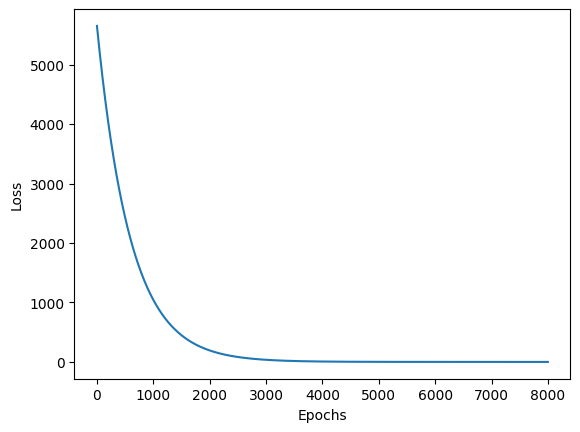

In [462]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [463]:
list(model.parameters())

[Parameter containing:
 tensor([[0.1961]], requires_grad=True),
 Parameter containing:
 tensor([0.8490], requires_grad=True)]

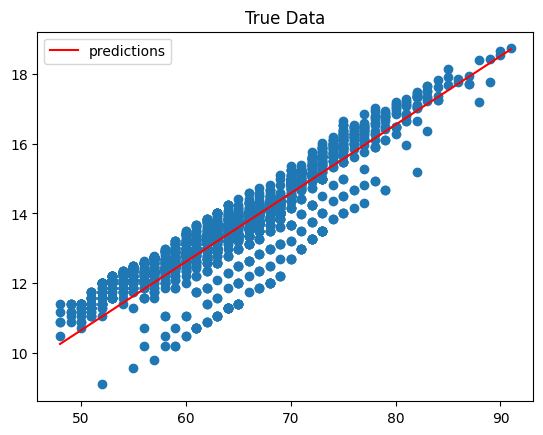

In [470]:
predicated=model(X_tensor).detach().numpy()
plt.scatter(X_tensor,y_tensor,colorizer='red')
plt.title("True Data")
plt.plot(X_tensor,predicated,color='red',label='predictions')
plt.legend()